# NLTK

Chapter 2 exercises 4, 8, 16, 17, 18, 23, 27

In [1]:
# import packages for assignment 
from nltk.book import *
import nltk
import matplotlib.pyplot as plt
import numpy as np

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


4.

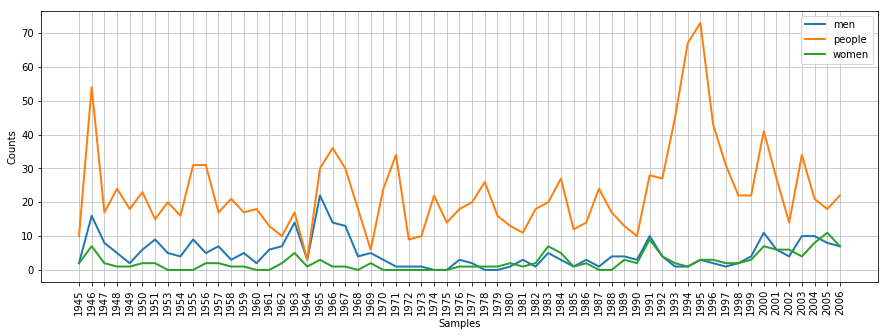

In [2]:
# read in texts of the State of the Union addresses
state_union = nltk.corpus.state_union

# count occurrences of men, women, and people over time
cfd = nltk.ConditionalFreqDist(
          (target, fileid[:4])
          for fileid in state_union.fileids()
          for w in state_union.words(fileid)
          for target in ['men', 'women', 'people']
          if w.lower().startswith(target))

# set plot size and plot word usage over time
plt.figure(figsize=(15, 5))
cfd.plot()

If we compare the most recent text with the oldest, the usage of these 3 words seems to have doubled. However, there doesn't appear to be any noticeable trends. Usage of these words seems to increase and then decrease every 1-2 years.

8.

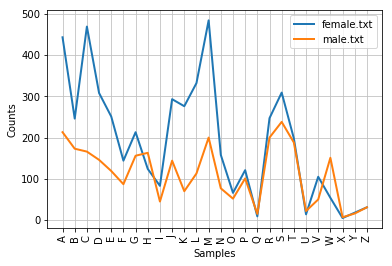

In [3]:
# read in Names word list
names = nltk.corpus.names

# define conditional frequency distribution
# over Names corpus to see which initial letters
# are more frequent for males vs females
cfd = nltk.ConditionalFreqDist(
          (fileid, name[0])
          for fileid in names.fileids()
          for name in names.words(fileid))

# plot distribution
cfd.plot()

In [4]:
# 3 most common initial letters for female names
cfd['female.txt'].most_common(3)

[('M', 484), ('C', 469), ('A', 443)]

In [5]:
# 3 most common initial letters for male names
cfd['male.txt'].most_common(3)

[('S', 238), ('A', 213), ('M', 200)]

16.

In [6]:
# read in Brown corpus
brown = nltk.corpus.brown

# generate table of lexical diversity scores for each genre
for genre in brown.categories():
    print('%-18s%-12f' % (genre, len(set(brown.words(categories=genre))) / 
           len(brown.words(categories=genre))))

adventure         0.127974    
belles_lettres    0.106421    
editorial         0.160542    
fiction           0.135819    
government        0.116676    
hobbies           0.144939    
humor             0.231251    
learned           0.092689    
lore              0.131488    
mystery           0.122129    
news              0.143147    
religion          0.161755    
reviews           0.211920    
romance           0.120705    
science_fiction   0.223428    


The learned genre has the lowest diversity and the humor genre has the greatest diversity. I would expect the opposite to be true since the learned texts consists of academic texts.

17.

In [7]:
# function that finds the 50 most frequently 
# occurring words of a text that are not stopwords
def freq_words(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w.lower() for w in text if w.lower() not in stopwords]
    return FreqDist(content).most_common(50)

# test function
freq_words(text1)

[(',', 18713),
 ('.', 6862),
 (';', 4072),
 ("'", 2684),
 ('-', 2552),
 ('"', 1478),
 ('!', 1269),
 ('whale', 1226),
 ('--', 1070),
 ('one', 921),
 ('like', 647),
 ('?', 637),
 ('upon', 566),
 ('man', 527),
 ('ship', 518),
 ('ahab', 511),
 ('."', 489),
 ('ye', 472),
 ('sea', 455),
 ('old', 450),
 ('would', 432),
 ('though', 384),
 ('head', 345),
 ('yet', 345),
 ('boat', 336),
 ('time', 334),
 ('long', 333),
 ('captain', 329),
 ('still', 312),
 ('great', 306),
 ('!"', 305),
 ('said', 304),
 (',"', 302),
 ('two', 298),
 ('must', 283),
 ('seemed', 283),
 ('white', 281),
 ('last', 277),
 ('see', 272),
 ('thou', 271),
 ('way', 271),
 ('whales', 268),
 ('stubb', 257),
 ('?"', 252),
 ('queequeg', 252),
 ('little', 249),
 ('round', 247),
 ('three', 245),
 ('say', 244),
 ('men', 244)]

18.

In [8]:
# text to test program with
text = text1

# print the 50 most frequent bigrams of a text 
# omitting bigrams that contain stopwords
stopwords = nltk.corpus.stopwords.words('english')
bigrams = list(nltk.bigrams(text))
content_bigrams = [(x, y) for (x, y) in bigrams 
                   if x.lower() not in stopwords and y.lower() not in stopwords]
FreqDist(content_bigrams).most_common(50)

[(('.', '"'), 557),
 (('."', '"'), 246),
 ((',', '"'), 179),
 (('whale', ','), 174),
 (('?"', '"'), 146),
 ((',', 'sir'), 135),
 ((',', 'though'), 133),
 ((',', 'like'), 132),
 ((',"', 'said'), 131),
 (('Sperm', 'Whale'), 118),
 (('whale', '-'), 114),
 (('Ahab', ','), 105),
 (('sea', ','), 104),
 (('man', ','), 99),
 (('say', ','), 94),
 (('.', 'CHAPTER'), 89),
 ((',', 'Ahab'), 88),
 (('Moby', 'Dick'), 83),
 (('ship', ','), 83),
 (('Stubb', ','), 82),
 (('whale', "'"), 81),
 (('head', ','), 81),
 (('old', 'man'), 80),
 (('ship', "'"), 80),
 (('boat', ','), 78),
 (('ye', ','), 77),
 (('."', '--'), 76),
 (('deck', ','), 76),
 (('mast', '-'), 75),
 (('Queequeg', ','), 75),
 (('Ahab', "'"), 75),
 (('White', 'Whale'), 74),
 ((',', 'yet'), 73),
 (('time', ','), 73),
 (('!"', '"'), 72),
 (('Oh', ','), 72),
 (('Aye', ','), 70),
 (('sea', '-'), 66),
 (('-', 'like'), 65),
 (('whales', ','), 63),
 (('Mr', '.'), 63),
 ((',', 'ye'), 61),
 (('sea', '.'), 61),
 ((',', 'Queequeg'), 61),
 (('Captain', 

23.

a.

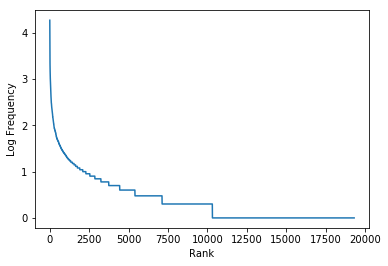

In [9]:
# function that processes large text and plot
# word frequency again word rank
def freq_rank(text):
    w, count = zip(*FreqDist(text).most_common())
    plt.plot(range(len(w)), np.log10(count))
    plt.xlabel('Rank')
    plt.ylabel('Log Frequency')
    plt.show()

# test function
freq_rank(text1)

The shape of the plot above confirms Zipf's Law in that the frequency of a word type is inversely proportional to its rank. The frequency of low rank words decreases very rapidly whereas the frequency of high rank words decreases very slowly.

b.

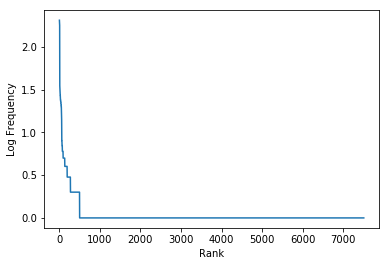

In [10]:
# import random package
import random

# generate random text
s = ''
for i in range(10**5):
    s += random.choice("abcdefg ")

# generate Zipf plot on tokenized string
freq_rank(s.split())

As shown above, the Zipf's Law applies even to random text. However, the shapes of the plot may vary depending on the text and therefore the constant *k* must also vary.

27.

In [11]:
# compute the average polysemy of nouns, verbs,
# adjectives, and adverbs according to Wordnet
from nltk.corpus import wordnet as wn
for pos in ['n', 'v', 'a', 'r']:
    count = 0
    total_senses = 0
    for w in wn.all_lemma_names(pos=pos, lang='eng'):
        count += 1
        total_senses += len(wn.synsets(w, pos))
    print('Part of speech ', pos, ': avg polysemy=', 
          "%0.4f" % (total_senses/count), 
          '=', total_senses, '/', count, sep='')

Part of speech n: avg polysemy=1.2611=148553/117798
Part of speech v: avg polysemy=2.1866=25209/11529
Part of speech a: avg polysemy=1.4065=30211/21479
Part of speech r: avg polysemy=1.2533=5616/4481
